# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import zipfile

# Get the path to the zip file
zip_file_path = '/content/gdrive/My Drive/GoogleStockData.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:

    # Extract the contents of the zip file to the current directory
    zip_file.extractall()


In [4]:
train_file = 'Google_Stock_Price_Train.csv'
test_file = 'Google_Stock_Price_Test.csv'

### Importing the training set

In [5]:
dataset_train = pd.read_csv(train_file)


training_set = dataset_train.iloc[:, 1:2].values

training_set.shape

(1258, 1)

### Feature Scaling

In [6]:
# Applying Normalisation -> minmax scaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [7]:
# 60 timesteps - at each time t ->
#RNN will look at tnow-t60 and output tnow+1

X_train = []
y_train = []


for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60: i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 207ms/step - loss: 0.0403
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 8s 221ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 10s 253ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0060
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0044
Epoch 13/10

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv(test_file)
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_date = dataset_test.iloc[:, 0:1].values


### Getting the predicted stock price of 2017

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i - 60: i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 45ms/step


### Visualising the results

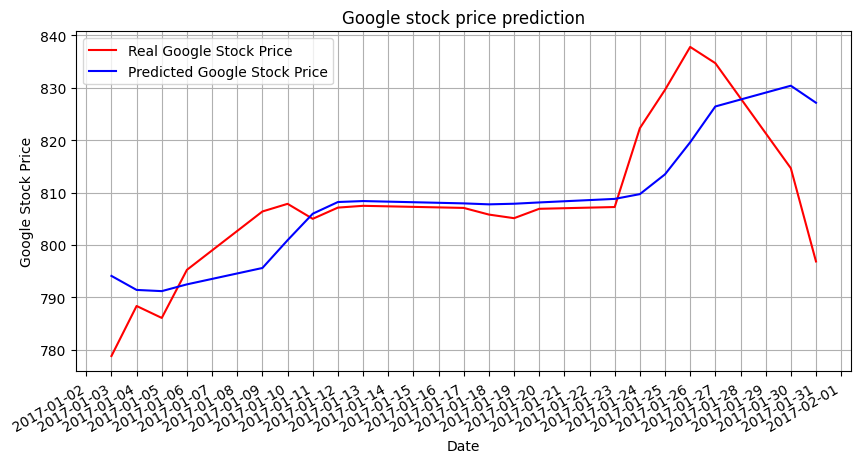

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

dates = [datetime.strptime(date[0], '%m/%d/%Y') for date in real_stock_date]
plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(dates, real_stock_price, color='red', label="Real Google Stock Price")
plt.plot(dates, predicted_stock_price, color='blue', label="Predicted Google Stock Price")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set interval to display every date

plt.gcf().autofmt_xdate()  # Auto-format the dates to look better
plt.title('Google stock price prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid(True)